In [1]:

import matplotlib.pyplot as plt
import numpy as np
import json

with open("data/spyfall_adversarial_gpt3.json",'r') as f:
    data_gpt3 = json.load(f)
with open("data/spyfall_adversarial_gpt4.json",'r') as f:
    data_gpt4 = json.load(f)

species = []
gpt3_round = []
gpt4_round = []
gpt3_winning_rate = []
gpt4_winning_rate = []

for key,value in data_gpt3.items():
    if key != "avg":
        species.append(key)
        gpt3_winning_rate.append(value["rate"])
        gpt3_round.append(value["round_avg"])

for key,value in data_gpt4.items():
    if key != "avg":
        gpt4_winning_rate.append(value["rate"])
        gpt4_round.append(value["round_avg"])

In [2]:
print(species)
print(gpt3_round)
print(gpt4_round)
print(gpt3_winning_rate)
print(gpt4_winning_rate)

['ipad&iphone', 'guitar&lute', 'BMW&BENZ', 'eyebrow&beard', 'Grape&Raisins', 'sea_lion&seal', 'spider_man&batman', 'nike&adidas', 'milk&soy_milk', 'motorcycle&electromobile', 'tiger&lion']
[1.9, 1.4375, 2.210526315789474, 1.3157894736842106, 1.55, 1.9444444444444444, 1.75, 1.6842105263157894, 1.75, 1.2, 1.6842105263157894]
[2.2777777777777777, 2.45, 2.3157894736842106, 1.7894736842105263, 1.55, 2.2, 2.15, 2.388888888888889, 2.35, 1.6, 1.5]
[0.2, 0.0, 0.05263157894736842, 0.05263157894736842, 0.15, 0.05555555555555555, 0.15, 0.10526315789473684, 0.15, 0.0, 0.05263157894736842]
[0.3333333333333333, 0.45, 0.47368421052631576, 0.3684210526315789, 0.15, 0.45, 0.5, 0.3888888888888889, 0.4, 0.3, 0.1875]


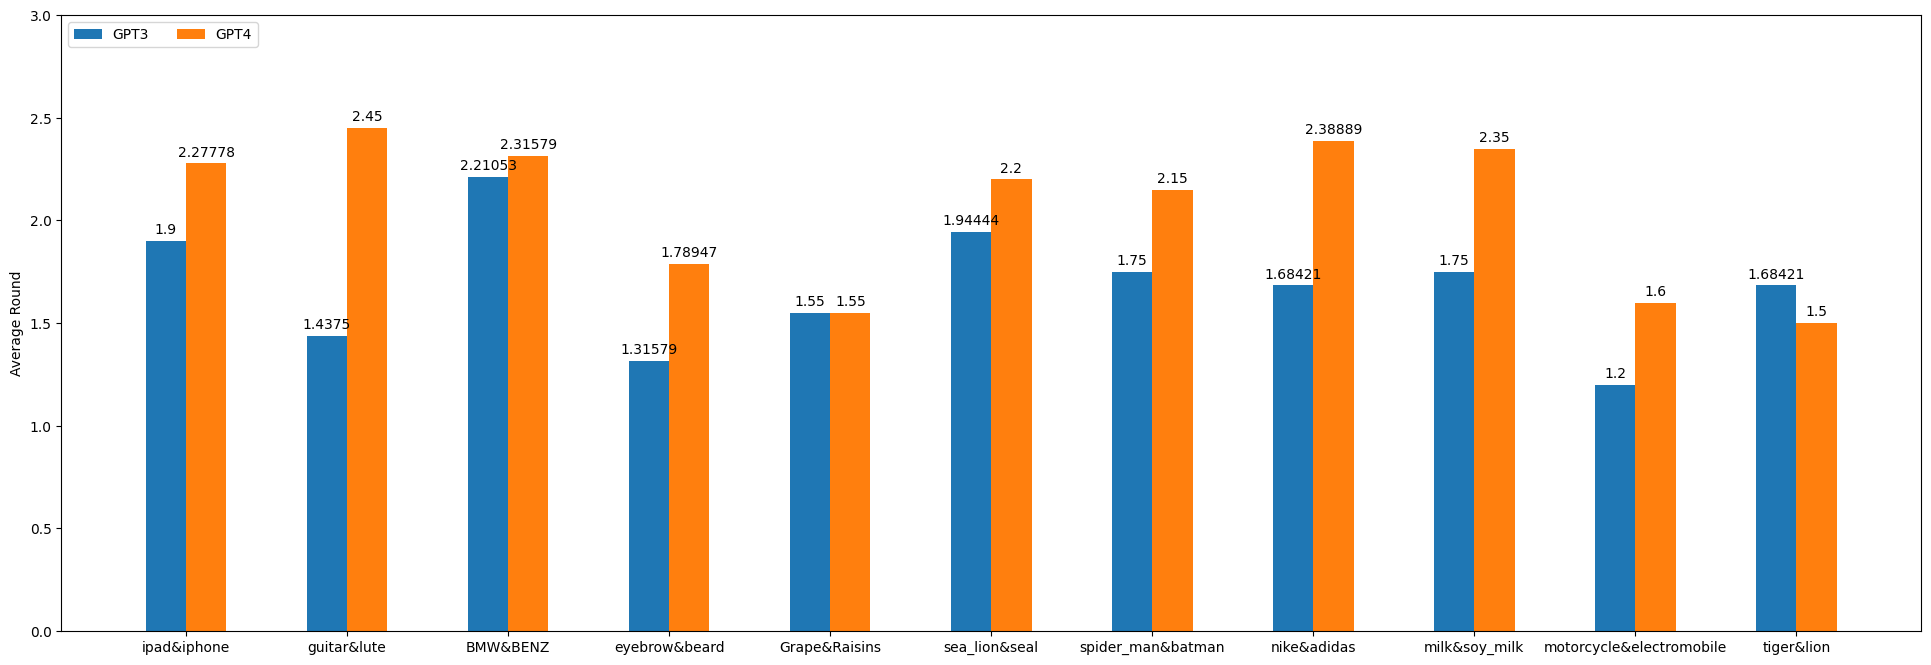

In [23]:

penguin_means = {
    'GPT3': gpt3_round,
    'GPT4': gpt4_round,
}


x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0.5

# fig, ax = plt.subplots(layout='constrained')
# plt.figure(figsize=(100,50))
fig, ax = plt.subplots(figsize=(24,8))
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Round')
ax.set_title('SpyFall')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 3)
# plt.savefig("imgs/avg_round.pdf")
plt.show()

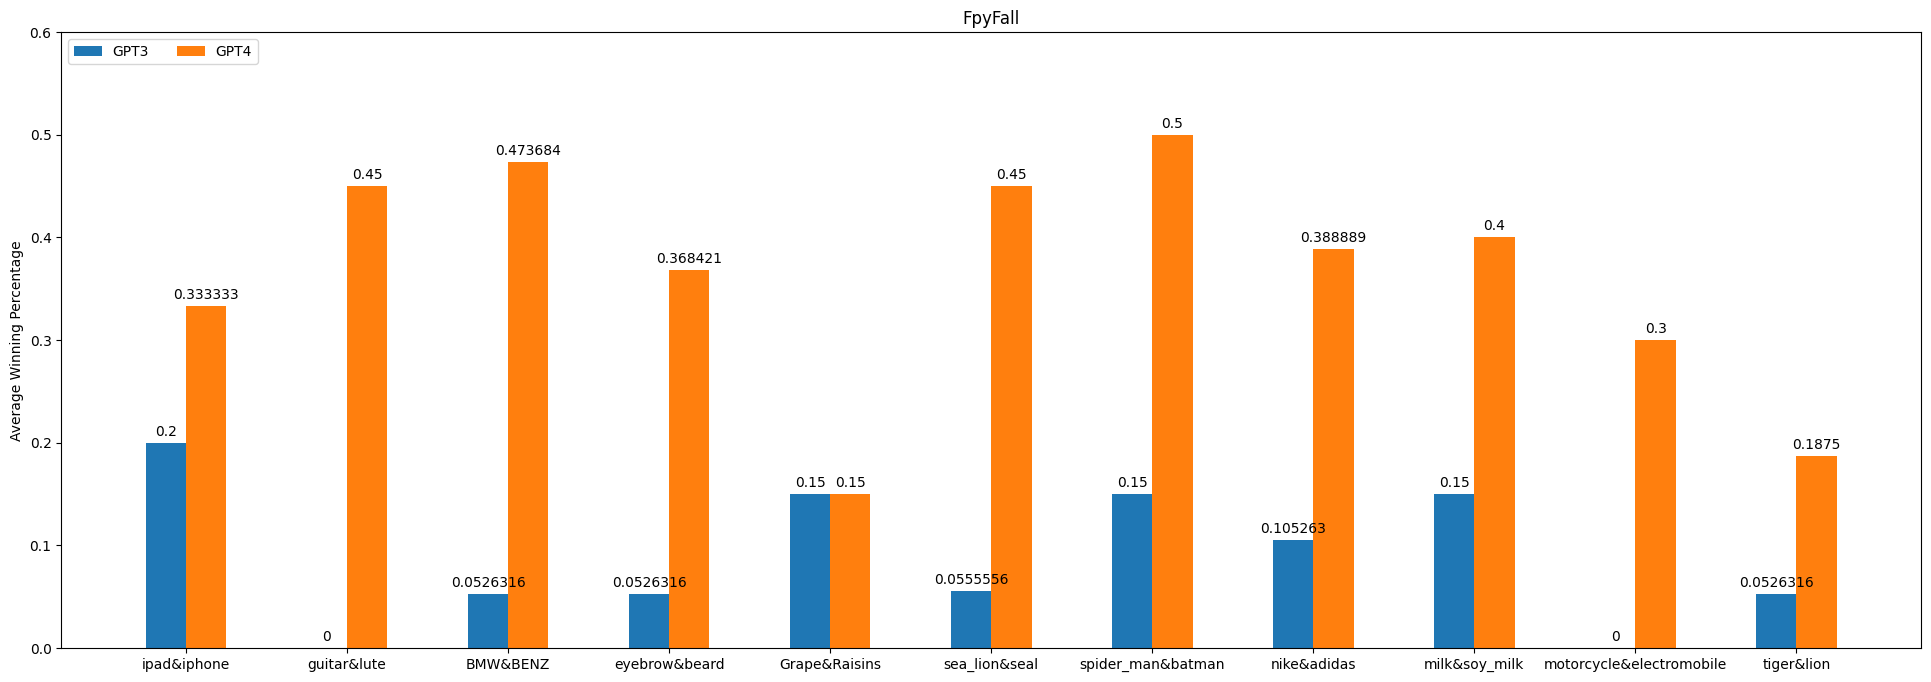

In [24]:

penguin_means = {
    'GPT3': gpt3_winning_rate,
    'GPT4': gpt4_winning_rate,
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0.5

# fig, ax = plt.subplots(layout='constrained')
# plt.figure(figsize=(100,50))
fig, ax = plt.subplots(figsize=(24,8))
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Winning Percentage')
ax.set_title('FpyFall')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 0.55)

plt.show()